### Aprendizaje supervisado
Actividad C1 P1 **Laura Katherine Henao Gonzalez**

El cáncer de próstata es uno de los tipos de cánceres más frecuentemente diagnosticados en todo el 
mundo. En concreto, ocupa la cuarta posición en cuanto a incidencia se refiere, lo cual es alarmante 
teniendo en cuenta que la enfermedad solo afecta a la mitad de la población (los hombres). 
Actualmente, el diagnóstico definitivo del cáncer de próstata viene precedido del examen visual de 
las muestras de tejido biopsiadas por parte del patólogo. Esta inspección manual consume grandes 
cantidades de tiempo y presenta un elevado grado de subjetividad entre diferentes patólogos. Por 
ello, en los últimos años, ha surgido la necesidad de desarrollar sistemas de ayuda al diagnóstico para 
reducir la gran carga de trabajo y el nivel de discordancia entre los especialistas. Dichos sistemas de 
ayuda al diagnóstico se basan en técnicas de inteligencia artificial aplicadas en regiones de tejido 
digitalizadas procedentes de las biopsias.

A menudo, los sistemas de ayuda al diagnóstico propuestos en la literatura abogan por una 
clasificación automática de los diferentes niveles de severidad que se pueden encontrar en las 
muestras de próstata. En esta actividad vamos a ver cómo, mediante técnicas de extracción de 
características, podemos obtener información y reconocer patrones a partir de las imágenes 
histológicas que pueden ayudarnos a diferenciar un tejido sano de un tejido cancerígeno en su etapa 
inicial. Una de las principales estructuras que nos permiten hacer esta distinción es el estudio de las 
glándulas individuales que aparecen en las muestras biopsiadas. Una glándula individual suele 
presentarse rodeada de estroma (masa de tejido rosa) y está formada por el lumen (estructura de 
color blanco correspondiente al interior del vaso sanguíneo), el citoplasma (capa morada que 
envuelve al lumen) y los núcleos (estructura azul oscura que delimita la glándula). 

Específicamente, en esta actividad, nos vamos a centrar en la estructura del lumen. Según 
recoge la literatura científica, la forma de los lúmenes de las glándulas puede actuar como un 
buen indicador para determinar si el tejido prostático es sano o cancerígeno. Los lúmenes que 
presentan un tamaño mayor y un aspecto más fusiforme (estrellado) suelen asociarse a un tejido 
sano, mientras que lúmenes más pequeños y redondeados encajan más con un perfil 
cancerígeno de Grado 3, según la escala Gleason. 

En base a este criterio, se propone **desarrollar un sistema de detección de lúmenes y aplicar 
descriptores geométricos que permitan caracterizar los lúmenes de las imágenes histológicas a 
fin de distinguir un tejido sano de un tejido cancerígeno en su etapa inicial.**

Para ello se propone una actividad guiada de desarrollo en Python que tendrá que resolverse 
para rellenar los apartados de la plantilla entregable. 

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


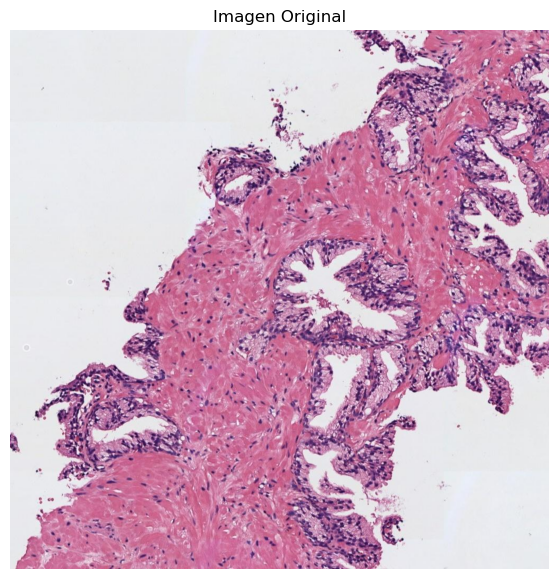

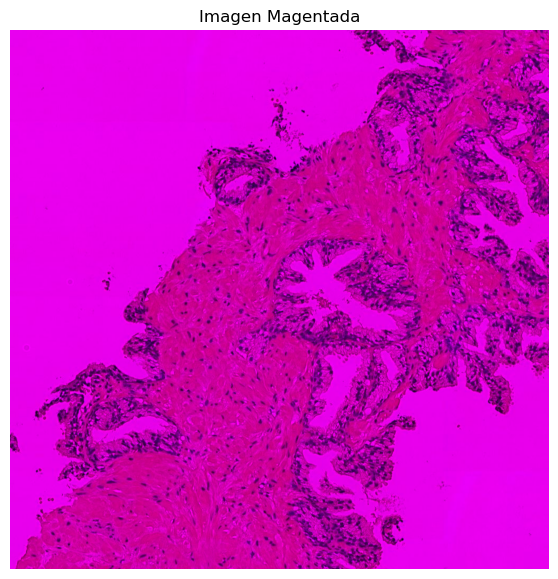

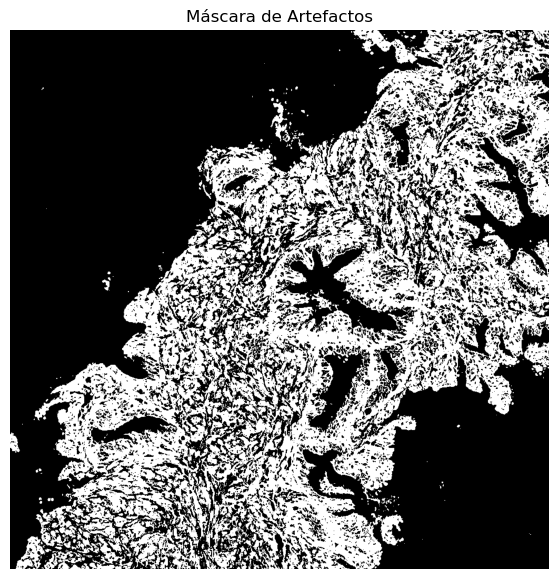

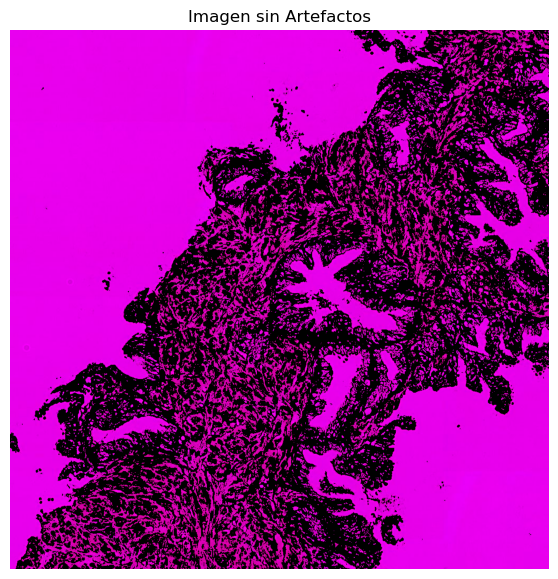

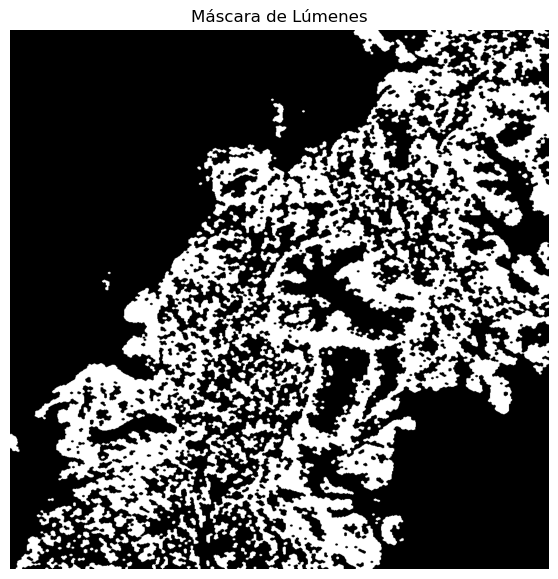

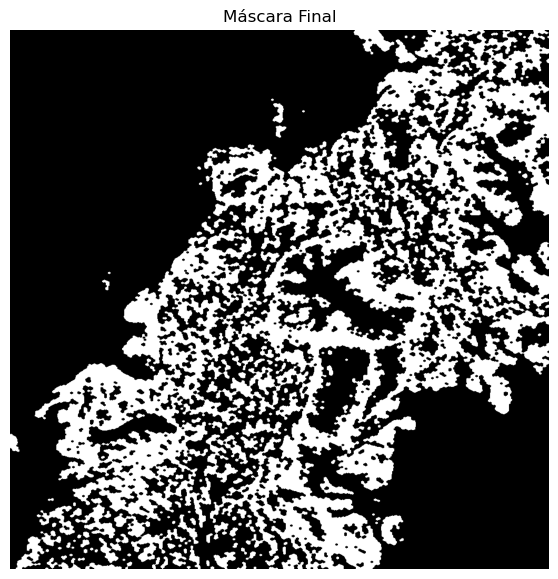

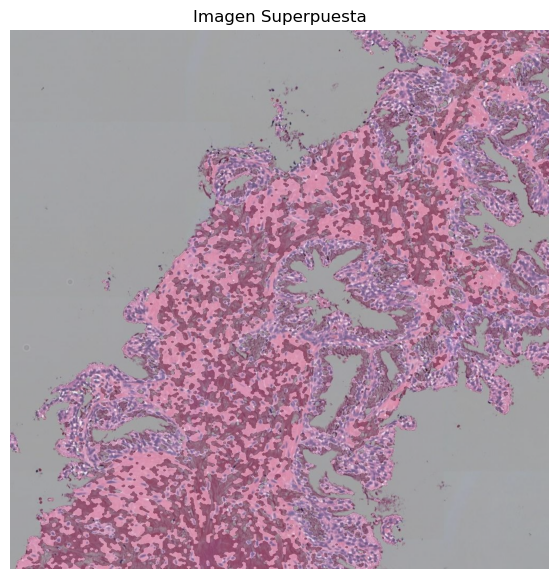

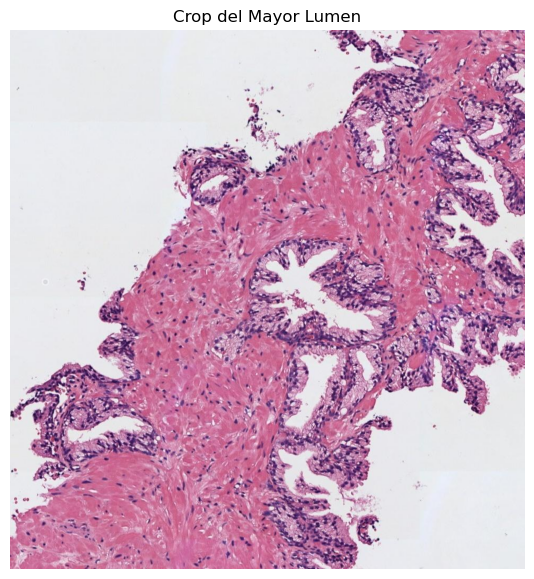

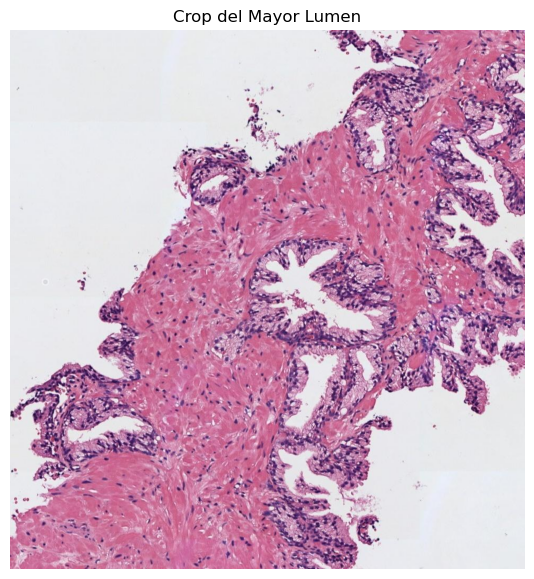

Área: 286231.00
Área de la bounding box: 1000448.00
Área convexa: 703992.00
Excentricidad: 0.84
Diámetro equivalente: 603.69
Extensión: 0.29
Diámetro Feret: 1255.33
Longitud del eje mayor: 1255.33
Longitud del eje menor: 680.34
Orientación: -0.78
Perímetro: 53602.99
Solidez: 0.41
Compacidad: 10038.33


In [8]:
import cv2
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Función para visualizar imágenes
def display_image(img, title):
    plt.figure(figsize=(7, 7))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
# Función para guardar imágenes
def save_image(img, filename):
    path = r'C:\Users\LHenao4\Desktop\\' + filename
    cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Paso 1: Carga y visualización de la imagen
img_bgr = cv2.imread(r'C:\Users\LHenao4\Desktop\Inteligencia Artificial\Aprendizaje supervisado\Actividad_C1_P1\histo_1.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display_image(img_rgb, "Imagen Original")
save_image(img_rgb, "1_Imagen_Original.jpg")

# Paso 2: Creación de la Imagen Magentada
img_magenta = img_rgb.copy()
img_magenta[:, :, 1] = 0
display_image(img_magenta, "Imagen Magentada")
save_image(img_magenta, "2_Imagen_Magentada.jpg")

# Paso 3: Creación de la Máscara de Artefactos
img_gray = cv2.cvtColor(img_magenta, cv2.COLOR_RGB2GRAY)
_, mask_artifacts = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display_image(mask_artifacts, "Máscara de Artefactos")
save_image(mask_artifacts, "3_Mascara_Artefactos.jpg")

# Paso 4: Creación de la Máscara sin Artefactos
mask_no_artifacts = cv2.bitwise_not(mask_artifacts)
img_no_artifacts = cv2.bitwise_and(img_magenta, img_magenta, mask=mask_no_artifacts)
display_image(img_no_artifacts, "Imagen sin Artefactos")
save_image(img_no_artifacts, "4_Imagen_Sin_Artefactos.jpg")

# Paso 5: Creación de la Máscara de Lúmenes
img_gray_no_artifacts = cv2.cvtColor(img_no_artifacts, cv2.COLOR_RGB2GRAY)
_, mask_lumens = cv2.threshold(img_gray_no_artifacts, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask_lumens = cv2.morphologyEx(mask_lumens, cv2.MORPH_OPEN, kernel)
mask_lumens = cv2.morphologyEx(mask_lumens, cv2.MORPH_CLOSE, kernel)
display_image(mask_lumens, "Máscara de Lúmenes")
save_image(mask_lumens, "5_Mascara_Lumenes.jpg")

# Paso 6: Máscara Final y Imagen Superpuesta
mask_final = mask_lumens.copy()
img_superimposed = cv2.addWeighted(img_rgb, 0.7, cv2.cvtColor(mask_final, cv2.COLOR_GRAY2RGB), 0.3, 0)
display_image(mask_final, "Máscara Final")
save_image(mask_final, "6_Mascara_Final.jpg")
display_image(img_superimposed, "Imagen Superpuesta")
save_image(img_superimposed, "7_Imagen_Superpuesta.jpg")

# Paso 7: Extracción y Caracterización del Lumen más Grande
labelled_mask = label(mask_final)
regions = regionprops(labelled_mask)
largest_lumen = max(regions, key=lambda region: region.area)
minr, minc, maxr, maxc = largest_lumen.bbox
crop_largest_lumen = img_rgb[minr:maxr, minc:maxc]
display_image(crop_largest_lumen, "Crop del Mayor Lumen")
save_image(crop_largest_lumen, "8_Crop_Mayor_Lumen.jpg")

# Etiquetar las regiones conectadas en mask_final
labelled_mask = label(mask_final)

# Obtener propiedades de las regiones etiquetadas
regions = regionprops(labelled_mask)

# Identificar el lumen más grande basado en el área
largest_lumen = max(regions, key=lambda region: region.area)

# Extraer el lumen más grande de la imagen original
minr, minc, maxr, maxc = largest_lumen.bbox
crop_largest_lumen = img_rgb[minr:maxr, minc:maxc]

# Visualizar el lumen más grande
plt.figure(figsize=(7, 7))
plt.imshow(crop_largest_lumen)
plt.axis('off')
plt.title('Crop del Mayor Lumen')
plt.show()

# Calcular y mostrar características geométricas del lumen más grande
features = {
    'Área': largest_lumen.area,
    'Área de la bounding box': (maxr - minr) * (maxc - minc),
    'Área convexa': largest_lumen.convex_area,
    'Excentricidad': largest_lumen.eccentricity,
    'Diámetro equivalente': largest_lumen.equivalent_diameter,
    'Extensión': largest_lumen.extent,
    'Diámetro Feret': largest_lumen.major_axis_length,
    'Longitud del eje mayor': largest_lumen.major_axis_length,
    'Longitud del eje menor': largest_lumen.minor_axis_length,
    'Orientación': largest_lumen.orientation,
    'Perímetro': largest_lumen.perimeter,
    'Solidez': largest_lumen.solidity,
    'Compacidad': largest_lumen.perimeter**2 / largest_lumen.area
}

for key, value in features.items():
    print(f"{key}: {value:.2f}")



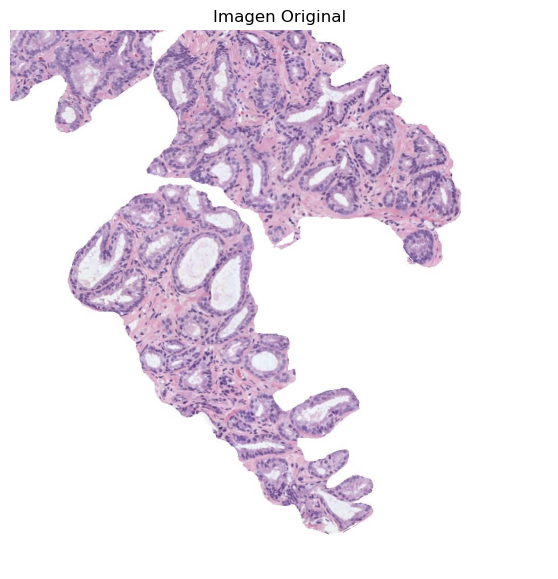

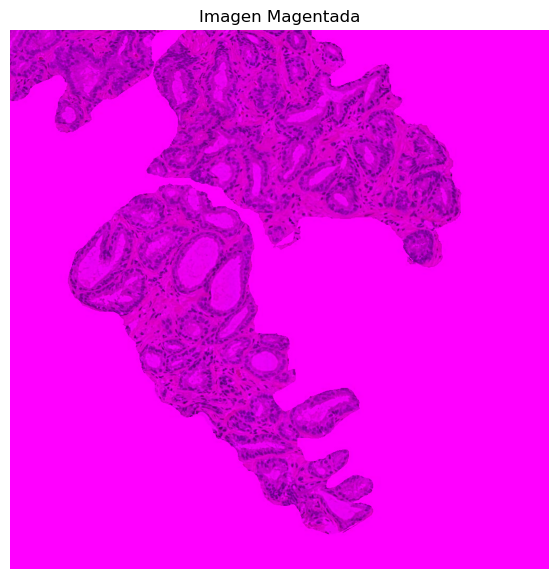

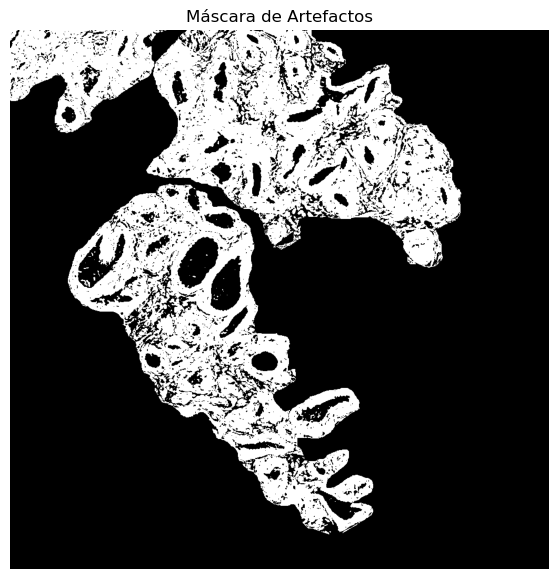

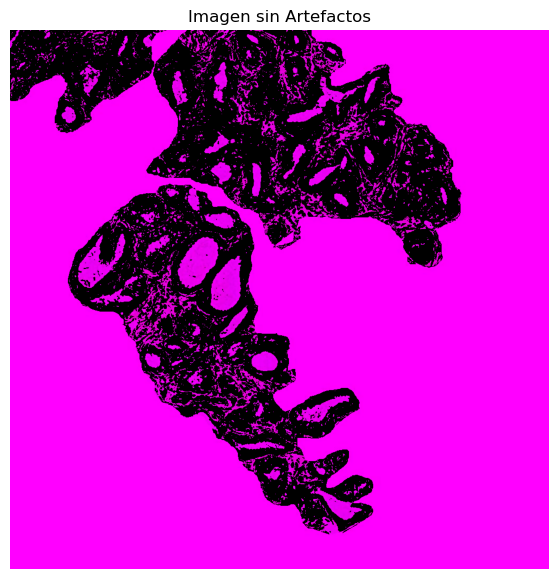

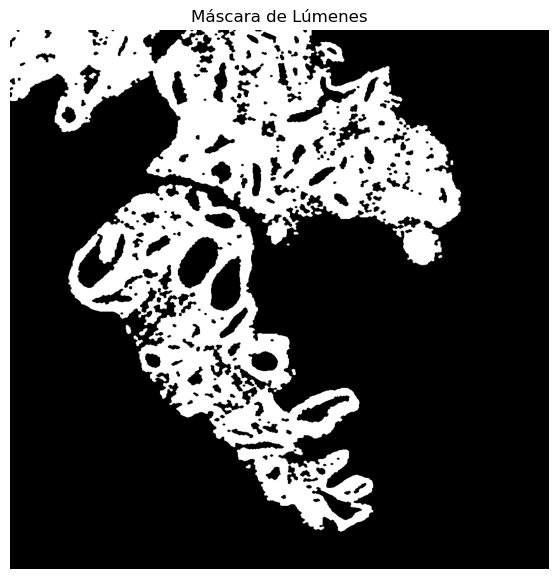

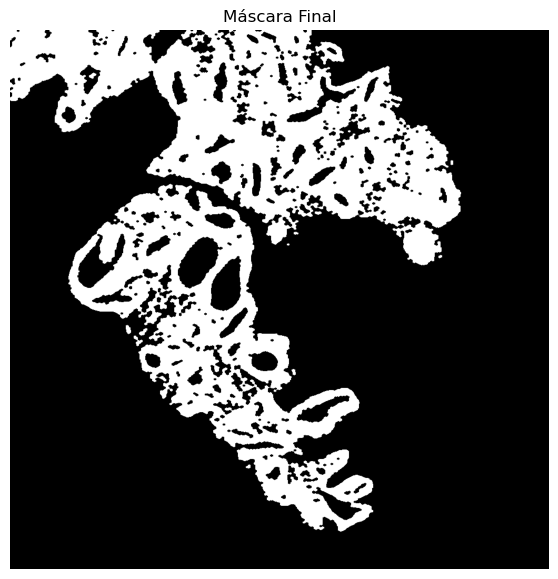

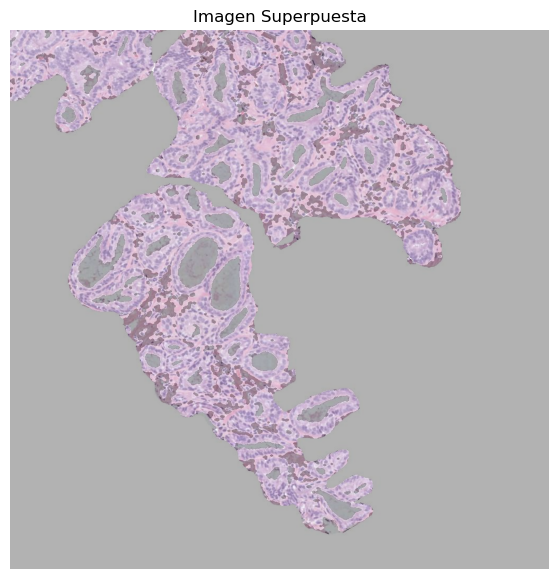

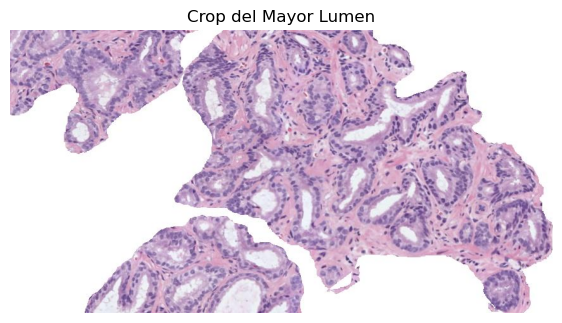

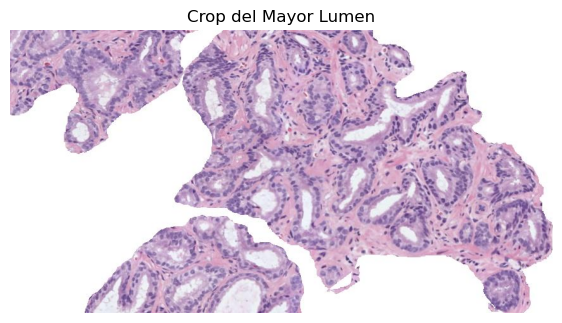

Área: 159983.00
Área de la bounding box: 383079.00
Área convexa: 259281.00
Excentricidad: 0.94
Diámetro equivalente: 451.33
Extensión: 0.42
Diámetro Feret: 924.44
Longitud del eje mayor: 924.44
Longitud del eje menor: 317.59
Orientación: 1.22
Perímetro: 13727.38
Solidez: 0.62
Compacidad: 1177.88


In [9]:
# Función para visualizar imágenes
def display_image(img, title):
    plt.figure(figsize=(7, 7))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
# Función para guardar imágenes
def save_image(img, filename):
    path = r'C:\Users\LHenao4\Desktop\\' + filename
    cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Paso 1: Carga y visualización de la imagen
img_bgr = cv2.imread(r'C:\Users\LHenao4\Desktop\Inteligencia Artificial\Aprendizaje supervisado\Actividad_C1_P1\histo_2.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display_image(img_rgb, "Imagen Original")
save_image(img_rgb, "1_Imagen_Original_2.jpg")

# Paso 2: Creación de la Imagen Magentada
img_magenta = img_rgb.copy()
img_magenta[:, :, 1] = 0
display_image(img_magenta, "Imagen Magentada")
save_image(img_magenta, "2_Imagen_Magentada_2.jpg")

# Paso 3: Creación de la Máscara de Artefactos
img_gray = cv2.cvtColor(img_magenta, cv2.COLOR_RGB2GRAY)
_, mask_artifacts = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display_image(mask_artifacts, "Máscara de Artefactos")
save_image(mask_artifacts, "3_Mascara_Artefactos_2.jpg")

# Paso 4: Creación de la Máscara sin Artefactos
mask_no_artifacts = cv2.bitwise_not(mask_artifacts)
img_no_artifacts = cv2.bitwise_and(img_magenta, img_magenta, mask=mask_no_artifacts)
display_image(img_no_artifacts, "Imagen sin Artefactos")
save_image(img_no_artifacts, "4_Imagen_Sin_Artefactos_2.jpg")

# Paso 5: Creación de la Máscara de Lúmenes
img_gray_no_artifacts = cv2.cvtColor(img_no_artifacts, cv2.COLOR_RGB2GRAY)
_, mask_lumens = cv2.threshold(img_gray_no_artifacts, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask_lumens = cv2.morphologyEx(mask_lumens, cv2.MORPH_OPEN, kernel)
mask_lumens = cv2.morphologyEx(mask_lumens, cv2.MORPH_CLOSE, kernel)
display_image(mask_lumens, "Máscara de Lúmenes")
save_image(mask_lumens, "5_Mascara_Lumenes_2.jpg")

# Paso 6: Máscara Final y Imagen Superpuesta
mask_final = mask_lumens.copy()
img_superimposed = cv2.addWeighted(img_rgb, 0.7, cv2.cvtColor(mask_final, cv2.COLOR_GRAY2RGB), 0.3, 0)
display_image(mask_final, "Máscara Final")
save_image(mask_final, "6_Mascara_Final_2.jpg")
display_image(img_superimposed, "Imagen Superpuesta")
save_image(img_superimposed, "7_Imagen_Superpuesta_2.jpg")

# Paso 7: Extracción y Caracterización del Lumen más Grande
labelled_mask = label(mask_final)
regions = regionprops(labelled_mask)
largest_lumen = max(regions, key=lambda region: region.area)
minr, minc, maxr, maxc = largest_lumen.bbox
crop_largest_lumen = img_rgb[minr:maxr, minc:maxc]
display_image(crop_largest_lumen, "Crop del Mayor Lumen")
save_image(crop_largest_lumen, "8_Crop_Mayor_Lumen.jpg")

# Etiquetar las regiones conectadas en mask_final
labelled_mask = label(mask_final)

# Obtener propiedades de las regiones etiquetadas
regions = regionprops(labelled_mask)

# Identificar el lumen más grande basado en el área
largest_lumen = max(regions, key=lambda region: region.area)

# Extraer el lumen más grande de la imagen original
minr, minc, maxr, maxc = largest_lumen.bbox
crop_largest_lumen = img_rgb[minr:maxr, minc:maxc]

# Visualizar el lumen más grande
plt.figure(figsize=(7, 7))
plt.imshow(crop_largest_lumen)
plt.axis('off')
plt.title('Crop del Mayor Lumen')
plt.show()

# Calcular y mostrar características geométricas del lumen más grande
features = {
    'Área': largest_lumen.area,
    'Área de la bounding box': (maxr - minr) * (maxc - minc),
    'Área convexa': largest_lumen.convex_area,
    'Excentricidad': largest_lumen.eccentricity,
    'Diámetro equivalente': largest_lumen.equivalent_diameter,
    'Extensión': largest_lumen.extent,
    'Diámetro Feret': largest_lumen.major_axis_length,
    'Longitud del eje mayor': largest_lumen.major_axis_length,
    'Longitud del eje menor': largest_lumen.minor_axis_length,
    'Orientación': largest_lumen.orientation,
    'Perímetro': largest_lumen.perimeter,
    'Solidez': largest_lumen.solidity,
    'Compacidad': largest_lumen.perimeter**2 / largest_lumen.area
}

for key, value in features.items():
    print(f"{key}: {value:.2f}")
